# Analiza Svetovne lestvice FIFA

Analiza je sestavljena iz 2 delov:
1. Primerjava najboljše in najslabše reprezentance s Slovenijo
2. Analiza celotne FIFA lestvice

In [2215]:
# Najprej naložimo vse pakete, ki jih potrebujemo
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# Prebere (naloži) CSV datoteko
reprezentance = pd.read_csv('reprezentance.csv', index_col='Ranking države')

# Pmogoči celotno širino stolpca
pd.set_option('display.max_colwidth', None)  


In [2216]:
reprezentance

,Narod,Število članov,Povprečna starost,Skupna vrednost,Točke
Ranking države,,,,,
1,Argentina,24,27.8,€730.00m,1889
2,France,23,26.0,€1.06bn,1852
3,Spain,23,26.7,€750.00m,1836
4,England,24,26.0,€1.46bn,1817
5,Brazil,23,26.5,€770.50m,1772
...,...,...,...,...,...
206,Turks-Caicos,16,21.2,€100k,803
207,US Virgin,21,24.3,-,792
208,B. Virgin,20,21.7,-,791


# 1. Primerjava najboljše in najslabše reprezentance s Slovenijo

V prvem delu sem naredil analizo najboljše in najslabše reprezentance na lestvici in ju primerjal s Slovenijo.

In [2217]:
najboljsa = reprezentance.iloc[0]  # Uporabimo iloc[0], da izberemo prvo vrstico

print("Podatki za trenutno vodilno reprezentanco:")
print(f"- Narod: {najboljsa['Narod']}")
print(f"- Število članov: {najboljsa['Število članov']}")
print(f"- Povprečna starost: {najboljsa['Povprečna starost']}")
print(f"- Skupna vrednost: {najboljsa['Skupna vrednost']}")
print(f"- Točke: {najboljsa['Točke']}")

Podatki za trenutno vodilno reprezentanco:
- Narod: Argentina
- Število članov: 24
- Povprečna starost: 27.8
- Skupna vrednost: €730.00m
- Točke: 1889


In [2218]:
najslabsa = reprezentance.iloc[-1] # Uporabimo iloc[-1], da izberemo zadnjo vrstico

print("Podatki za najslabšo reprezentanco:")
print(f"- Narod: {najslabsa['Narod']}")
print(f"- Število članov: {najslabsa['Število članov']}")
print(f"- Povprečna starost: {najslabsa['Povprečna starost']}")
print(f"- Skupna vrednost: {najslabsa['Skupna vrednost']}")
print(f"- Točke: {najslabsa['Točke']}")

Podatki za najslabšo reprezentanco:
- Narod: San Marino
- Število članov: 27
- Povprečna starost: 24.5
- Skupna vrednost: €1.08m
- Točke: 746


In [2219]:
slovenija = reprezentance[reprezentance['Narod'] == 'Slovenia'] # Poiščemo vrstico v kateri je slovenija

podatki_slovenije = slovenija.iloc[0]

ranking_slovenija = slovenija.index[0]  # Dobimo ranking iz indeksa

print("Podatki za reprezentanco Slovenije:")
print(f"- Ranking države: {ranking_slovenija}")
print(f"- Narod: {slovenija.iloc[0]['Narod']}")
print(f"- Število članov: {slovenija.iloc[0]['Število članov']}")
print(f"- Povprečna starost: {slovenija.iloc[0]['Povprečna starost']}")
print(f"- Skupna vrednost: {slovenija.iloc[0]['Skupna vrednost']}")
print(f"- Točke: {slovenija.iloc[0]['Točke']}")

Podatki za reprezentanco Slovenije:
- Ranking države: 51
- Narod: Slovenia
- Število članov: 23
- Povprečna starost: 27.8
- Skupna vrednost: €126.75m
- Točke: 1463


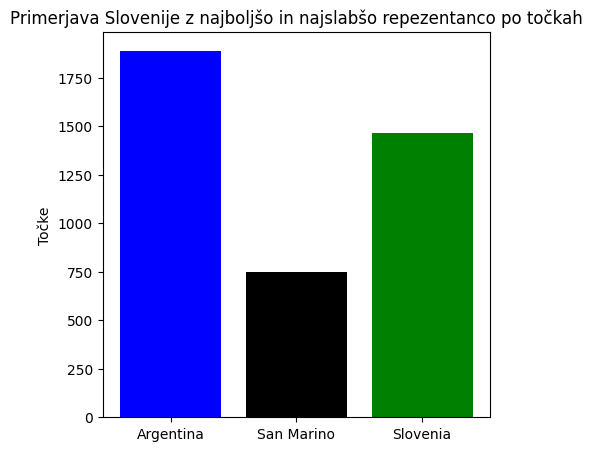

In [2220]:
# Ustvari seznam imen reprezentanc in njihovih točk
drzave = [najboljsa['Narod'], najslabsa['Narod'], podatki_slovenije['Narod']]
tocke = [najboljsa['Točke'], najslabsa['Točke'], podatki_slovenije['Točke']]

# Nariše graf
plt.figure(figsize=(5, 5))
plt.bar(drzave, tocke, color=['blue', 'black', 'green'])
plt.ylabel('Točke')
plt.title('Primerjava Slovenije z najboljšo in najslabšo repezentanco po točkah')
plt.show()

In [2221]:
# Pridobi skupne vrednosti igralcev za Slovenijo ter najboljšo in najslabšo ekipo
vrednost_igralcev_slovenije = slovenija['Skupna vrednost'].values[0]
vrednost_igralcev_najboljse = najboljsa['Skupna vrednost']
vrednost_igralcev_najslabse = najslabsa['Skupna vrednost']

print(f"Vrednost igralcev najboljše ekipe ({najboljsa['Narod']}) je {vrednost_igralcev_najboljse}.")
print(f"Vrednost igralcev najslabše ekipe ({najslabsa['Narod']}) je {vrednost_igralcev_najslabse}.")
print(f"Vrednost igralcev Slovenije je {vrednost_igralcev_slovenije}.")

Vrednost igralcev najboljše ekipe (Argentina) je €730.00m.
Vrednost igralcev najslabše ekipe (San Marino) je €1.08m.
Vrednost igralcev Slovenije je €126.75m.


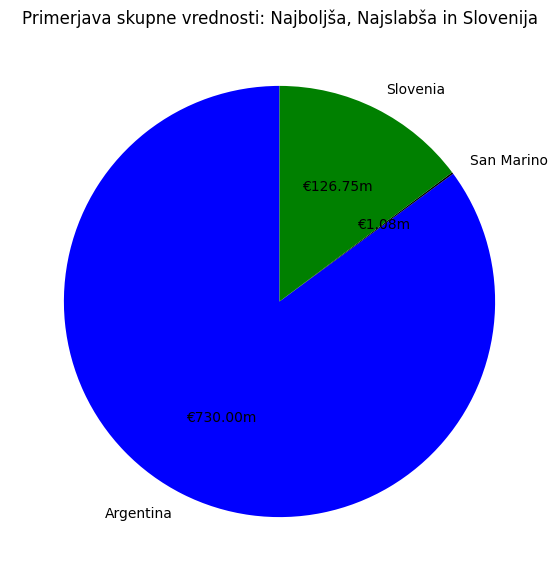

In [2222]:
# Ustvari seznam skupnih vrednosti
vrednosti = [najboljsa['Skupna vrednost'], najslabsa['Skupna vrednost'], podatki_slovenije['Skupna vrednost']]

# Pretvorimo vrednosti iz stringa v numerične vrednosti
def pretvori_vrednost(value):
    value = value.replace('€', '').replace('m', 'e6').replace('bn', 'e9').replace('k','e3')
    return eval(value)

pretvorjene_vrednosti = [pretvori_vrednost(vrednost) for vrednost in vrednosti]

def vrni_originalno_vrednost(originalne_vrednosti):
    def moja_oblika(x):
        celotna = sum(pretvorjene_vrednosti)
        for i, y in enumerate(pretvorjene_vrednosti):
            if abs(x * celotna / 100.0 - y) < celotna * 0.01:
                return originalne_vrednosti[i]
        return ''
    return moja_oblika

# Ustvari tortni diagram
plt.figure(figsize=(7, 7))
plt.pie(pretvorjene_vrednosti, labels=drzave, autopct=vrni_originalno_vrednost(vrednosti), startangle=90, colors=['blue', 'black', 'green'])
plt.title('Primerjava skupne vrednosti: Najboljša, Najslabša in Slovenija')
plt.show()


In [2223]:
stevilo_clanov_najboljsa = najboljsa['Število članov']
stevilo_clanov_najslabsa = najslabsa['Število članov']
stevilo_clanov_slovenija = podatki_slovenije['Število članov']

vrednost_na_igralca_najboljsa = pretvorjene_vrednosti[0] / stevilo_clanov_najboljsa
vrednost_na_igralca_najslabsa = pretvorjene_vrednosti[1] / stevilo_clanov_najslabsa
vrednost_na_igralca_slovenija = pretvorjene_vrednosti[2] / stevilo_clanov_slovenija

print(f"Vrednost na igralca za najboljšo ekipo ({najboljsa['Narod']}): €{vrednost_na_igralca_najboljsa:,.0f}")
print(f"Vrednost na igralca za najslabšo ekipo ({najslabsa['Narod']}): €{vrednost_na_igralca_najslabsa:,.0f}")
print(f"Vrednost na igralca za Slovenijo: €{vrednost_na_igralca_slovenija:,.0f}")


Vrednost na igralca za najboljšo ekipo (Argentina): €30,416,667
Vrednost na igralca za najslabšo ekipo (San Marino): €40,000
Vrednost na igralca za Slovenijo: €5,510,870


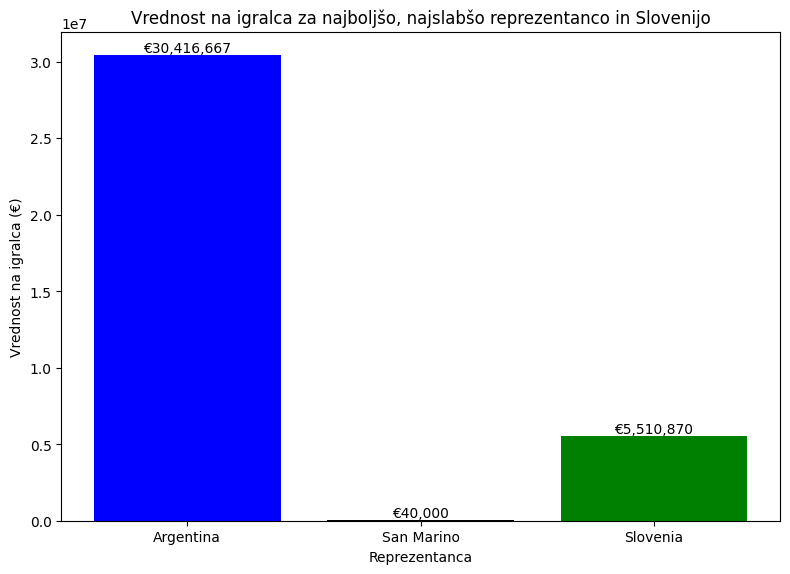

In [2224]:
vrednosti_na_igralca = [vrednost_na_igralca_najboljsa, vrednost_na_igralca_najslabsa, vrednost_na_igralca_slovenija]

# Ustvari graf 
plt.figure(figsize=(8, 6))
plt.bar(drzave, vrednosti_na_igralca, color=['blue', 'black', 'green'])
plt.title('Vrednost na igralca za najboljšo, najslabšo reprezentanco in Slovenijo')
plt.ylabel('Vrednost na igralca (€)')
plt.xlabel('Reprezentanca')

for i, y in enumerate(vrednosti_na_igralca): # Na grafu se izpiše vrednost
    plt.text(i, y, f"€{y:,.0f}", ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


# 2. Analiza celotne FIFA lestvice

V tem delu analize sem se osredotočil na vse države, ki so na lestvici in naredil analizo.

In [2225]:
# Najprej moram stolpec "Skupna vrednost" pretvoriti v numerično obliko za računanje
reprezentance['Skupna vrednost (pretvorjena)'] = reprezentance['Skupna vrednost']

def pretvori_vrednost(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace(',', '').strip()
        try:
            if 'bn' in value.lower():
                return float(value.replace('bn', '').strip()) * 1_000_000_000
            elif 'm' in value.lower():
                return float(value.replace('m', '').strip()) * 1_000_000
            elif 'k' in value.lower():
                return float(value.replace('k', '').strip()) * 1_000
            elif '-' in value:
                return -float(value.replace('-', '').strip())
            else:
                return float(value)
        except ValueError:
            return pd.NA
    else:
        return value

# Pretvori vrednosti in shrani v nov stolpec 
reprezentance['Skupna vrednost (pretvorjena)'] = reprezentance['Skupna vrednost'].apply(pretvori_vrednost)

# Odstrani vrstice z NaN vrednostmi
reprezentance_pobrisi = reprezentance.dropna(subset=['Skupna vrednost (pretvorjena)']).copy()

# Pretvori stolpec 'Skupna vrednost (pretvorjena)' v float
reprezentance_pobrisi['Skupna vrednost (pretvorjena)'] = pd.to_numeric(reprezentance_pobrisi['Skupna vrednost (pretvorjena)'], errors='coerce')

# Ponovno odstrani vrstice z NaN vrednostmi po pretvorbi
reprezentance_pobrisi = reprezentance_pobrisi.dropna(subset=['Skupna vrednost (pretvorjena)'])

# Poišče 10 najdražjih reprezentanc
najdrazjih_10 = reprezentance_pobrisi.nlargest(10, 'Skupna vrednost (pretvorjena)')[['Narod', 'Skupna vrednost']]

print("10 najdražjih reprezentanc na FIFA lestvici")
print(najdrazjih_10)

10 najdražjih reprezentanc na FIFA lestvici
                      Narod Skupna vrednost
Ranking države                             
4                   England         €1.46bn
2                    France         €1.06bn
8                  Portugal        €987.00m
7               Netherlands        €782.00m
5                    Brazil        €770.50m
3                     Spain        €750.00m
1                 Argentina        €730.00m
10                    Italy        €609.00m
13                  Germany        €595.50m
6                   Belgium        €483.25m


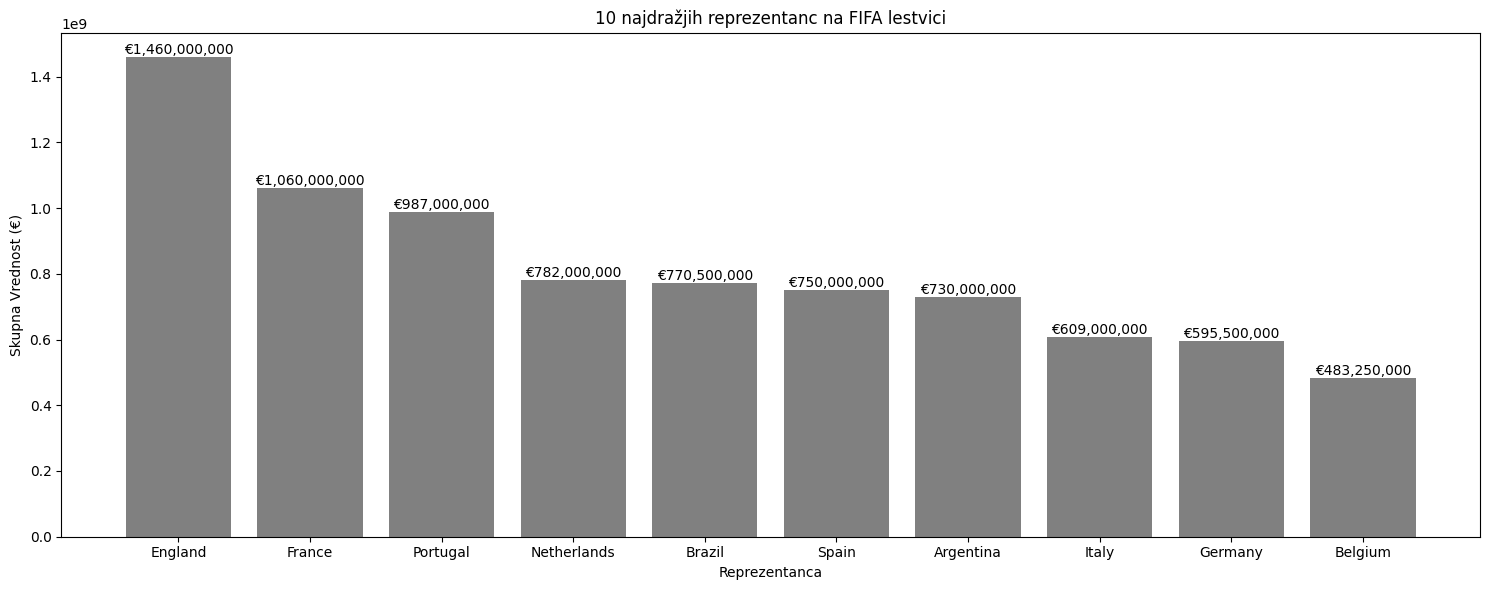

In [2226]:
# Pretvori vrednosti 'Skupna vrednost' v  float za najdrazjih 10
najdrazjih_10['Skupna vrednost'] = najdrazjih_10['Skupna vrednost'].apply(pretvori_vrednost)

# Odstrani NaN vrednostmi
najdrazjih_10 = najdrazjih_10.dropna(subset=['Skupna vrednost'])

# Ustvari stolpični diagram za 10 najdražjih reprezentanc
plt.figure(figsize=(15, 6))
plt.bar(najdrazjih_10['Narod'], najdrazjih_10['Skupna vrednost'], color='grey')
plt.title('10 najdražjih reprezentanc na FIFA lestvici')
plt.xlabel('Reprezentanca')
plt.ylabel('Skupna Vrednost (€)')

for index, value in enumerate(najdrazjih_10['Skupna vrednost']): # Na grafu se izpiše vrednost
    plt.text(index, value, f"€{value:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [2227]:
# Enako kot prej vendar za najcenejših 10
najcenejsih_10_reprezentanc = reprezentance_pobrisi.nsmallest(10, 'Skupna vrednost (pretvorjena)')[['Narod', 'Skupna vrednost']]

print("10 najcenejših reprezentanc (za ketere je podana vrednost) na FIFA lestvici")
print(najcenejsih_10_reprezentanc)

10 najcenejših reprezentanc (za ketere je podana vrednost) na FIFA lestvici
                         Narod Skupna vrednost
Ranking države                                
195             Cayman Islands            €10k
199                      Tonga            €10k
201                 Seychelles            €35k
206               Turks-Caicos           €100k
170                    Bermuda           €125k
182                     Belize           €125k
133                     Malawi           €150k
121                      Libya           €275k
185                      Samoa           €285k
159                   Eswatini           €400k


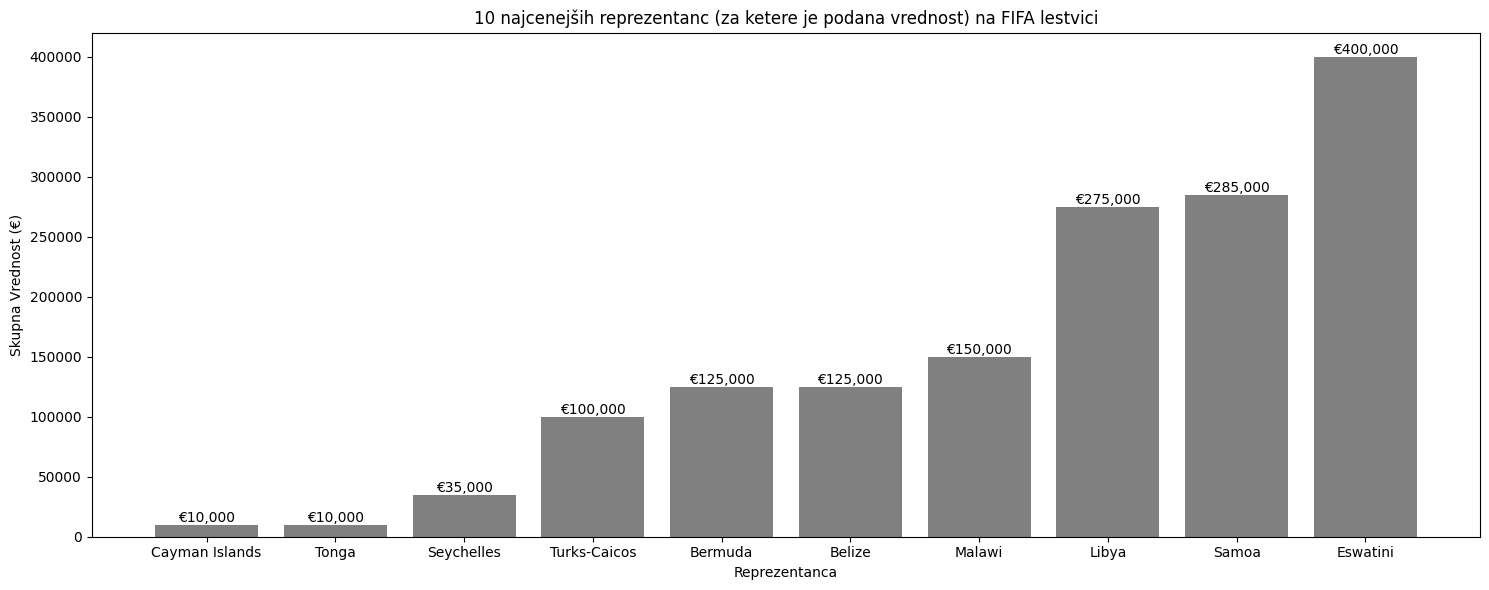

In [2228]:
# Pretvori vrednosti 'Skupna vrednost' v  float za najcenejših 10
najcenejsih_10_reprezentanc['Skupna vrednost'] = najcenejsih_10_reprezentanc['Skupna vrednost'].apply(pretvori_vrednost)

# Odstrani NaN vrednostmi
najcenejsih_10_reprezentanc = najcenejsih_10_reprezentanc.dropna(subset=['Skupna vrednost'])

# Ustvari stolpični diagram za 10 najcenejših reprezentanc
plt.figure(figsize=(15, 6))
plt.bar(najcenejsih_10_reprezentanc['Narod'], najcenejsih_10_reprezentanc['Skupna vrednost'], color='grey')
plt.title('10 najcenejših reprezentanc (za ketere je podana vrednost) na FIFA lestvici')
plt.xlabel('Reprezentanca')
plt.ylabel('Skupna Vrednost (€)')

for index, value in enumerate(najcenejsih_10_reprezentanc['Skupna vrednost']): # Na grafu se izpiše vrednost
    plt.text(index, value, f"€{value:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [2229]:
# Poišče reprezentanco z najvišjo in najnižjo povprečno starostjo
najstarejsa_reprezentanca = reprezentance.loc[reprezentance['Povprečna starost'].idxmax()]

najmlajsa_reprezentanca = reprezentance.loc[reprezentance['Povprečna starost'].idxmin()]

povprecna_starost = reprezentance['Povprečna starost'].mean()

print(f"Najstarejša reprezentanca na lestvici je {najstarejsa_reprezentanca['Narod']} s povprečno starostjo {najstarejsa_reprezentanca['Povprečna starost']} let")
print(f"Najmlajša reprezentanca na lestvici je {najmlajsa_reprezentanca['Narod']} s povprečno starostjo {najmlajsa_reprezentanca['Povprečna starost']} let")
print(f"Povprečna starost reprezentanc na lestvici je {povprecna_starost:.1f} let")

Najstarejša reprezentanca na lestvici je Bahrain s povprečno starostjo 29.6 let
Najmlajša reprezentanca na lestvici je Turks-Caicos s povprečno starostjo 21.2 let
Povprečna starost reprezentanc na lestvici je 26.4 let


In [2230]:
# Izračuna modus,  mediano in standardni odklon stolpca 'Povprečna starost'
modus_starost = reprezentance['Povprečna starost'].mode()[0]
mediana_starost = reprezentance['Povprečna starost'].median()
standardni_odklon = reprezentance['Povprečna starost'].std()

print(f"Modus povprečne starosti reprezentanc je {modus_starost} let. \n"
      f"Modus je vrednost, ki se v podatkih najpogosteje pojavlja, kar pomeni, da je povprečna starost {modus_starost} let najpogostejša med vsemi reprezentancami. \n")

print(f"Mediana povprečne starosti reprezentanc je {mediana_starost} let. \n"
      f"Mediana je srednja vrednost v urejenem nizu podatkov, kar pomeni, da je polovica reprezentanc mlajša od {mediana_starost} let, druga polovica pa starejša.\n")

print(f"Standardni odklon povprečne starosti reprezentanc je {standardni_odklon:.2f} let. \n"
      f"Standardni odklon meri, koliko so vrednosti povprečne starosti odmaknjene od povprečja. ")

Modus povprečne starosti reprezentanc je 26.5 let. 
Modus je vrednost, ki se v podatkih najpogosteje pojavlja, kar pomeni, da je povprečna starost 26.5 let najpogostejša med vsemi reprezentancami. 

Mediana povprečne starosti reprezentanc je 26.55 let. 
Mediana je srednja vrednost v urejenem nizu podatkov, kar pomeni, da je polovica reprezentanc mlajša od 26.55 let, druga polovica pa starejša.

Standardni odklon povprečne starosti reprezentanc je 1.47 let. 
Standardni odklon meri, koliko so vrednosti povprečne starosti odmaknjene od povprečja. 


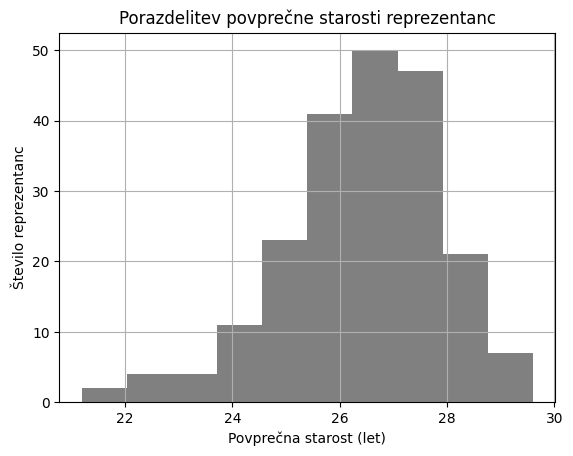

In [2231]:
# Nariše histogram
reprezentance['Povprečna starost'].hist(bins=10, color='grey')
plt.title('Porazdelitev povprečne starosti reprezentanc')
plt.xlabel('Povprečna starost (let)')
plt.ylabel('Število reprezentanc')
plt.show()

In [2232]:
# Poišče reprezentanco z največjim in najmanjšim številom članov
najvec_clanov_reprezentanca = reprezentance.loc[reprezentance['Število članov'].idxmax()]

najmanj_clanov_reprezentanca = reprezentance.loc[reprezentance['Število članov'].idxmin()]

povprecno_stevilo_clanov = reprezentance['Število članov'].mean()

print(f"Reprezentanca z največjim številom članov je {najvec_clanov_reprezentanca['Narod']} s {najvec_clanov_reprezentanca['Število članov']} člani")
print(f"Reprezentanca z najmanjšim številom članov je {najmanj_clanov_reprezentanca['Narod']} s {najmanj_clanov_reprezentanca['Število članov']} člani")
print(f"Povprečno število članov reprezentanc na lestvici je {povprecno_stevilo_clanov:.1f} člana")

Reprezentanca z največjim številom članov je The Gambia s 36 člani
Reprezentanca z najmanjšim številom članov je Turks-Caicos s 16 člani
Povprečno število članov reprezentanc na lestvici je 24.4 člana


In [2233]:
# Izračuna modus, mediano in standardni odklon stolpca 'Število članov'
modus_clanov = reprezentance['Število članov'].mode()[0]

mediana_clanov = reprezentance['Število članov'].median()

standardni_odklon_clanov = reprezentance['Število članov'].std()

print(f"Modus števila članov reprezentanc je {modus_clanov} članov. \n"
      f"Modus je vrednost, ki se v podatkih najpogosteje pojavlja, kar pomeni, da ima največ reprezentanc {modus_clanov} članov. \n")

print(f"Mediana števila članov reprezentanc je {mediana_clanov} članov. \n"
      f"Mediana je srednja vrednost v urejenem nizu podatkov, kar pomeni, da polovica reprezentanc šteje manj kot {mediana_clanov} članov, druga polovica pa več.\n")

print(f"Standardni odklon števila članov reprezentanc je {standardni_odklon_clanov:.2f} članov. \n"
      f"Standardni odklon meri, koliko so vrednosti števila članov odmaknjene od povprečja.")

Modus števila članov reprezentanc je 23 članov. 
Modus je vrednost, ki se v podatkih najpogosteje pojavlja, kar pomeni, da ima največ reprezentanc 23 članov. 

Mediana števila članov reprezentanc je 24.0 članov. 
Mediana je srednja vrednost v urejenem nizu podatkov, kar pomeni, da polovica reprezentanc šteje manj kot 24.0 članov, druga polovica pa več.

Standardni odklon števila članov reprezentanc je 2.52 članov. 
Standardni odklon meri, koliko so vrednosti števila članov odmaknjene od povprečja.


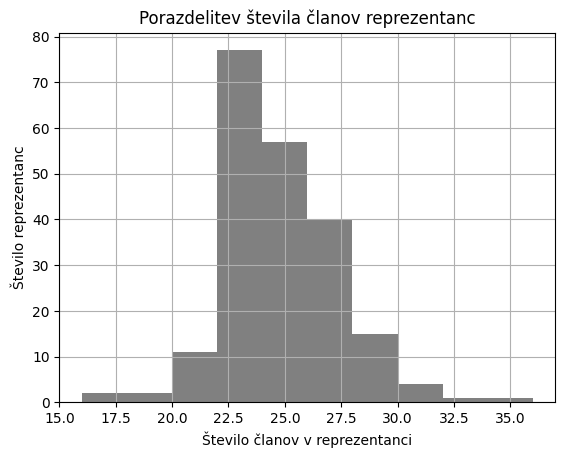

In [2234]:
# Ustvari histogram za stolpec 'Število članov'
reprezentance['Število članov'].hist(bins=10, color='grey')
plt.title('Porazdelitev števila članov reprezentanc')
plt.xlabel('Število članov v reprezentanci')
plt.ylabel('Število reprezentanc')
plt.show()

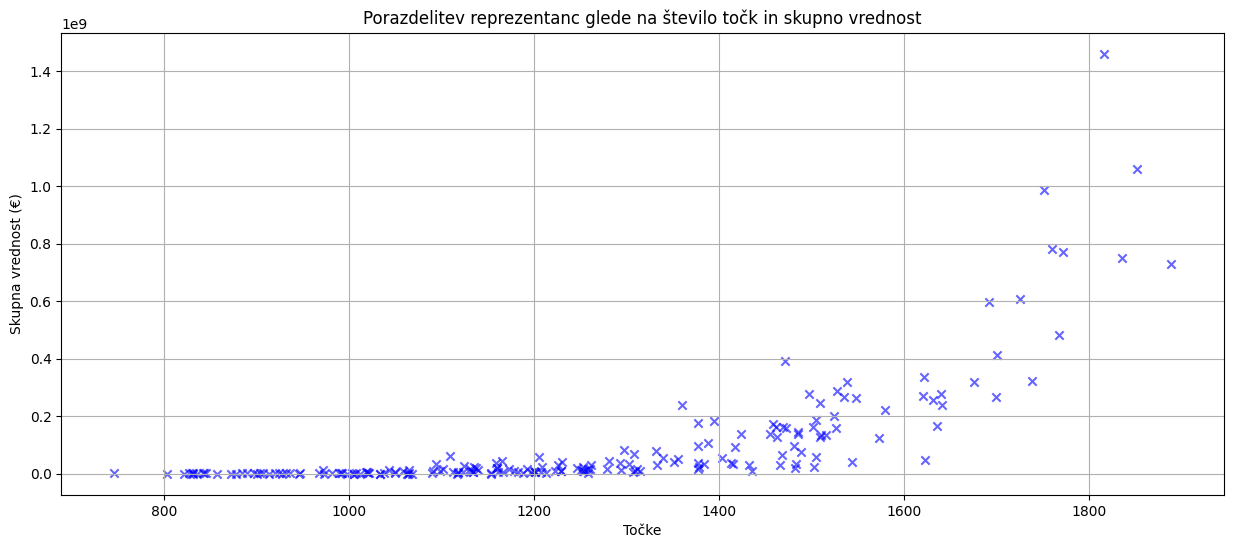

In [2235]:
# Ustvari graf za porazdelitev reprezentanc glede na 'Točke' in 'Skupna vrednost'
plt.figure(figsize=(15, 6))
plt.scatter(reprezentance_pobrisi['Točke'], reprezentance_pobrisi['Skupna vrednost (pretvorjena)'], color='blue', alpha=0.6, marker='x')
plt.title('Porazdelitev reprezentanc glede na število točk in skupno vrednost')
plt.xlabel('Točke')
plt.ylabel('Skupna vrednost (€)')
plt.grid(True)
plt.show()